<a href="https://colab.research.google.com/github/lapatradaa/MCTS/blob/main/MCTS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd C:\Users\puigu\Desktop\MCTS

C:\Users\puigu\Desktop\MCTS


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train.shape[0]

233234

In [ ]:
train = train.dropna(axis=1, how='any')

In [ ]:
train.shape[0]

233234

In [ ]:
train.head()

,Id,GameRulesetName,agent1,agent2,Properties,Format,Time,Discrete,Realtime,Turns,...,DoLudeme,Trigger,PlayoutsPerSecond,MovesPerSecond,EnglishRules,LudRules,num_wins_agent1,num_draws_agent1,num_losses_agent1,utility_agent1
0,0,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-ProgressiveHistory-0.6-Random200-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",4,0,11,-0.466667
1,1,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-UCB1GRAVE-0.6-NST-true,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333
2,2,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.1-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",7,0,8,-0.066667
3,3,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.6-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333
4,4,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1GRAVE-1.41421356237-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333


In [ ]:
import pandas as pd

def drop_columns(df):
    """
    Drops the specified columns from the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame from which columns will be dropped.

    Returns:
    pd.DataFrame: The DataFrame with the specified columns removed.
    """
    columns_to_drop = ['Id', 'num_wins_agent1', 'num_draws_agent1', 'num_losses_agent1','EnglishRules', 'LudRules']

    # Drop the specified columns and store in df_cleaned
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

    return df_cleaned


In [ ]:
# Assuming train is your DataFrame
train_cleaned = drop_columns(train)

# Display the cleaned DataFrame
train_cleaned.head(5)


,GameRulesetName,agent1,agent2,Properties,Format,Time,Discrete,Realtime,Turns,Alternating,...,SetHiddenWho,Efficiency,CopyContext,Then,ForEachPiece,DoLudeme,Trigger,PlayoutsPerSecond,MovesPerSecond,utility_agent1
0,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-ProgressiveHistory-0.6-Random200-false,1,1,1,1,0,1,1,...,0,1,0,1,0,0,1,298.07,18877.17,-0.466667
1,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-UCB1GRAVE-0.6-NST-true,1,1,1,1,0,1,1,...,0,1,0,1,0,0,1,298.07,18877.17,-0.333333
2,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.1-NST-false,1,1,1,1,0,1,1,...,0,1,0,1,0,0,1,298.07,18877.17,-0.066667
3,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.6-NST-false,1,1,1,1,0,1,1,...,0,1,0,1,0,0,1,298.07,18877.17,-0.333333
4,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1GRAVE-1.41421356237-NST-false,1,1,1,1,0,1,1,...,0,1,0,1,0,0,1,298.07,18877.17,-0.333333


In [ ]:
df = train_cleaned

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your cleaned DataFrame
# Separate features (X) and target (y)
X = df.drop(columns=['utility_agent1'])  # Drop the target column from features
y = df['utility_agent1']  # The target column

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


Training the model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 84.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


Validation RMSE: 0.33605275037606414
                                                Feature  Importance
559                                         AdvantageP1    0.196997
784                                   PlayoutsPerSecond    0.020554
551                                 DurationTurnsStdDev    0.019681
616                               BranchingFactorMedian    0.018033
552                            DurationTurnsNotTimeouts    0.013876
...                                                 ...         ...
220                            HopDecisionEnemyToFriend    0.000000
1581  GameRulesetName_Ludus_CoriovalliHaretavl_Four_...    0.000000
209                       LeapDecisionToFriendFrequency    0.000000
1583  GameRulesetName_Ludus_CoriovalliHaretavl_Four_...    0.000000
0                                            Properties    0.000000

[2307 rows x 2 columns]


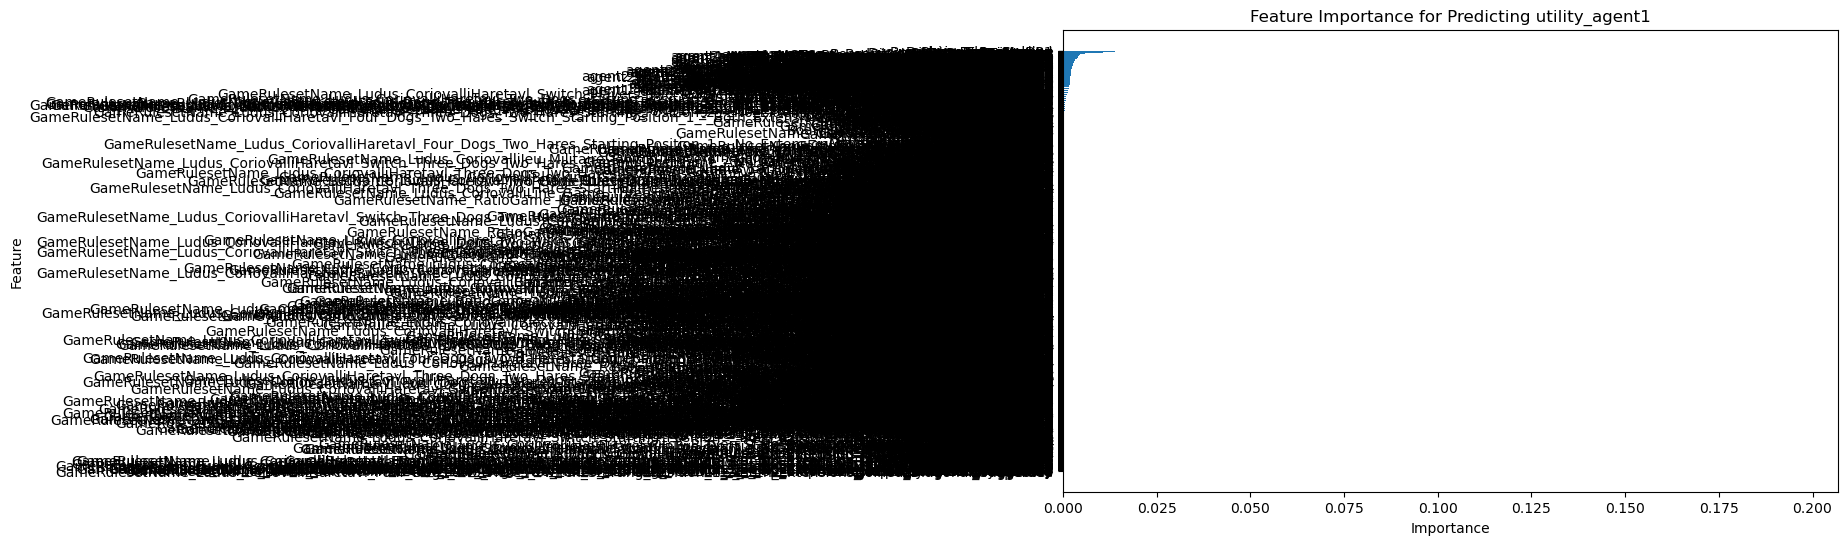

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with categorical features
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['agent1', 'agent2', 'GameRulesetName'])

# Separate features and target
X = df_encoded.drop(columns=['utility_agent1'])  # Drop the target column from features
y = df_encoded['utility_agent1']  # The target column

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with verbose=1 for basic progress monitoring
model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)

# Train the model with text-based logging
print("Training the model...")
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model performance (RMSE)
mse = mean_squared_error(y_valid, y_pred)
rmse = mse ** 0.5
print(f'Validation RMSE: {rmse}')

# Get feature importance
importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame to visualize the importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting utility_agent1')
plt.gca().invert_yaxis()  # Invert y-axis so the most important feature is at the top
plt.show()


In [ ]:
# Save the model as 'mcts.pkl'
joblib.dump(model, 'mcts.pkl')

print("Model saved as 'mcts_model.pkl'")

Model saved as 'mcts_model.pkl'


In [ ]:
import pandas as pd
import joblib

# Load the test dataset
test_df = pd.read_csv('test.csv')

# One-Hot Encode categorical variables in test set
test_encoded = pd.get_dummies(test_df, columns=['agent1', 'agent2', 'GameRulesetName'])

# Ensure the test set has the same columns as the training set
test_encoded = test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Load the saved Random Forest model
model = joblib.load('mcts.pkl')

# Make predictions on the test set
test_predictions = model.predict(test_encoded)

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'utility_agent1': test_predictions
})
output_df.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv'")


Predictions saved to 'submission.csv'


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
pd.read_csv('submission.csv').head(5)

,utility_agent1
0,0.183333
1,-0.210000
2,0.071333
